In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stripROtools
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from stripROtools import colors




In [2]:
# Load exp data
df_exp = pd.read_pickle("./data/resolution_exp.pk")

# Load sim data
df_sim = pd.read_pickle("./data/resolution_sim.pk")


df_sim.head()

,Name,x_res,x_res_err,y_res,y_res_err,abs_z
0,UH_DLC_a,"[38.77810545176335, 35.22943553467575, 38.0863...","[0.0007765748978853815, 0.0008391479314021729,...","[40.7902965897492, 38.72557396847153, 43.55672...","[0.0009326616105153065, 0.0008739772390221997,...","[0.1, 0.3, 0.5, 0.7, 0.9, 1.1]"
1,UH_NoDLC_a,"[43.61871777026019, 41.57178281767986, 41.1792...","[0.000706572985031821, 0.0008616424104633634, ...","[44.29153976421668, 46.06120528985288, 42.4980...","[0.0006854052676493003, 0.0008841854342560201,...","[0.1, 0.3, 0.5, 0.7, 0.9, 1.1]"
2,UoS,"[38.33678984026937, 34.36161870947947, 36.2944...","[0.0003466565065767244, 0.000335634590370781, ...","[41.7026477542917, 36.34327814478202, 35.68110...","[0.0004015573023818841, 0.00033888198866150913...","[0.1, 0.3, 0.5, 0.7, 0.9, 1.1]"


In [3]:
# fit function used to determine contributions to effective point resolution that are not included in simulation
def fit(x, a):
	return np.sqrt(x**2 + a**2)

# UH DLC Quadrant a

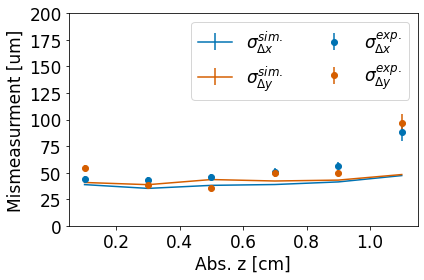

In [4]:
# index specifying detector
index = 0

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)

DTrans = 0.0135


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
#plt.plot(abs_z, np.sqrt( ( 200/np.sqrt(12) )**2 +(np.sqrt(abs_z)*DTrans*10000)**2), color=colors["black"] )
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,200))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_DLC_PR.pdf")


In [5]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  28.44473193580289 +/- 2.0900253760157956
The additional point res. contribution on the y strips is:  14.61471607467013 +/- 3.530988560163976


# UH NoDLC Quadrant a

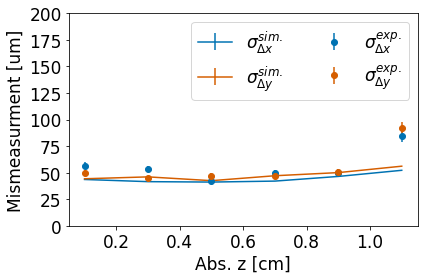

In [6]:
# index specifying detector
index = 1

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,200))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_NoDLC_PR.pdf")


In [7]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  27.259817808004247 +/- 2.2905894367446287
The additional point res. contribution on the y strips is:  16.635957831380644 +/- 3.4966717465015615


# UoS Detector

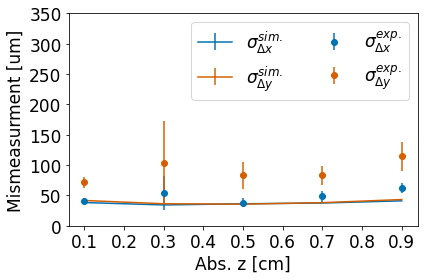

In [10]:
# index specifying detector
index = 2

##### Note!!! ##### 
# We switch x and y since the x strips are the upper strips in the (actual) UoS detector
# The plots in Po210.ipynb do not include this switch

abs_z_sim = np.array(df_sim.iloc[index].abs_z)
abs_z_exp = np.array(df_exp.iloc[index].abs_z)


x_res = np.array(df_exp.iloc[index].y_res)
x_res_err = np.array(df_exp.iloc[index].y_res_err)
y_res = np.array(df_exp.iloc[index].x_res)
y_res_err = np.array(df_exp.iloc[index].x_res_err)

x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z_sim[0:5],x_res_sim[0:5],x_res_err_sim[0:5],color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z_sim[0:5],y_res_sim[0:5],y_res_err_sim[0:5],color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z_exp,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z_exp,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,350))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UoS_PR.pdf")


In [9]:
# Fit simulation data + additional resolution term to experimental data on the x strips


x_vals = x_res_sim[0:len(abs_z_exp)]
sigmas = np.sqrt(x_res_err**2 + (x_res_err_sim[0:len(abs_z_exp)])**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim[0:len(abs_z_exp)]
sigmas = np.sqrt(y_res_err**2 + (y_res_err_sim[0:len(abs_z_exp)])**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  23.602437130178128 +/- 6.433690066438835
The additional point res. contribution on the y strips is:  67.16252120080348 +/- 7.901098451820707
